# Principal Component Analysis (PCA) Overview
Notes by Messiah Ataey (github.com/ataey)

In [1]:
# standard imports and configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns
%matplotlib inline

### Applying PCA to a Cancer Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# load dataset
cancer = load_breast_cancer()

# partition data, fix random state
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=22)

# view the shape of the training data
print(X_train.shape)

(426, 30)


In [3]:
# extract malign and benign samples
mal = cancer.data[cancer.target == 0]
ben = cancer.data[cancer.target == 1]

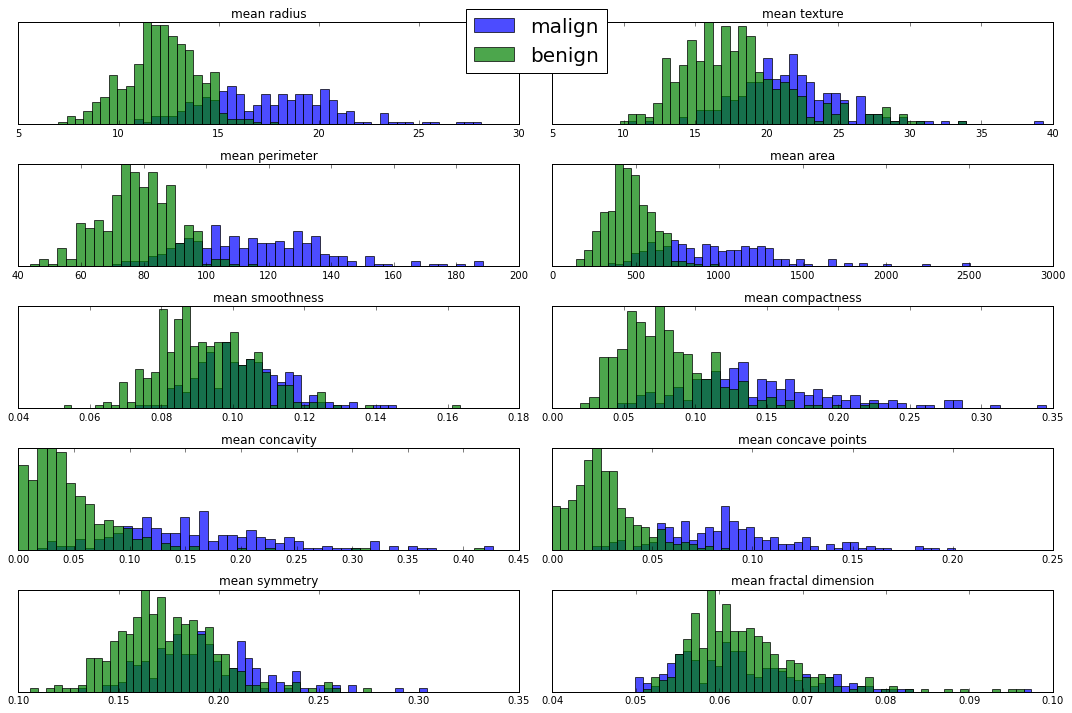

In [4]:
# plot histograms for the first 10 features in the dataset 

fig, axes = plt.subplots(5, 2, figsize=(15,10))

for i, ax in enumerate(axes.ravel()):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax.hist(mal[:, i], bins=bins, alpha=0.7)
    ax.hist(ben[:, i], bins=bins, alpha=0.7)
    ax.set_title(cancer.feature_names[i])
    ax.set_yticks(())
    
fig.legend(["malign", "benign"], loc="upper center", fontsize=20)
fig.tight_layout()

These histograms show the range of values for benign and malignant samples across uniform intervals (bins) for a certain number of features. It gives an idea of how each feature is distributed across the two classes and enables one to identify which features are better or worse at distinguishing between them.

In [5]:
# scale data using standard scalar
from sklearn.preprocessing import StandardScaler

# instantiate, fit and transform data
cancer_scaled = StandardScaler().fit_transform(cancer.data)

PCA finds vectors (components) in the multi-dimensional input space that retain the most variance in the data. The data can then be projected onto these components in order to reduce the dimensionality of the dataset. 

In [6]:
# apply PCA with two components
from sklearn.decomposition import PCA

# instantiate and fit the feature vectors (i.e., evaluate principal components)
pca = PCA(n_components=2).fit(cancer_scaled)

# project data onto the first two principal components
cancer_pca = pca.transform(cancer_scaled)

# view the shape of the new input space
print(cancer_pca.shape)

(569, 2)


([], <a list of 0 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

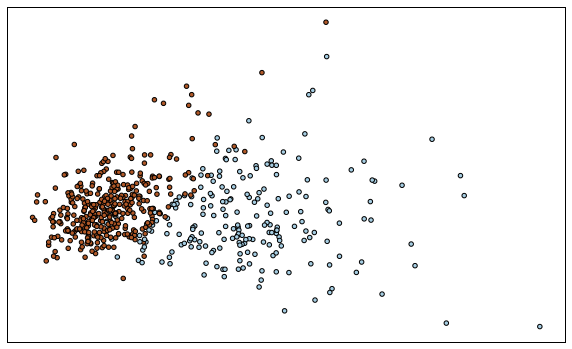

In [7]:
# plot the rotated, shifted and reduced dataset in two-dimensions

fig = plt.figure()
plt.figure(figsize=(10,6))
plt.scatter(cancer_pca[:, 0], cancer_pca[:, 1], c=cancer.target, cmap='Paired')
plt.xticks([]); plt.yticks([])

As we can see from the above graph, the PCA algorithm reduced the dataset to two-dimensions, and hence it is able to be visualized conveniently. Moreover, we can see that PCA does a fairly good job in seperating the two classes even in such a compact feature space.

In [8]:
# view the shape and contents of the principal components
print('Component shape: {0}\n'.format(pca.components_.shape))
print('Component array:\n{0}'.format(pca.components_))

Component shape: (2, 30)

Component array:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0.5, 0, 'First 10 features of the principal components')

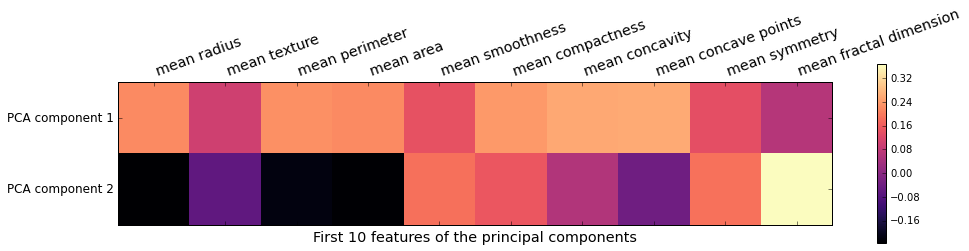

In [9]:
# plot a heatmap of the first 10 features of the two principal components

plt.matshow(pca.components_[:, :10], cmap='magma')
plt.yticks([0,1], ['PCA component 1', 'PCA component 2'], fontsize='large')
plt.xticks(range(len(cancer.feature_names[:10])), cancer.feature_names[:10], rotation=20, fontsize='x-large', horizontalalignment='left', verticalalignment='bottom')
plt.colorbar()
plt.xlabel('First 10 features of the principal components', fontsize='x-large')

### Using PCA for Feature Extraction on an Image Dataset

In [10]:
from sklearn.datasets import fetch_lfw_people

# fecth faces in the wild dataset
faces = fetch_lfw_people(min_faces_per_person=15)

# extract feature space of dataset
faces_shape = faces.images[0].shape

# 3595 instances of 62x47 images
print(faces.images.shape)

(3595, 62, 47)


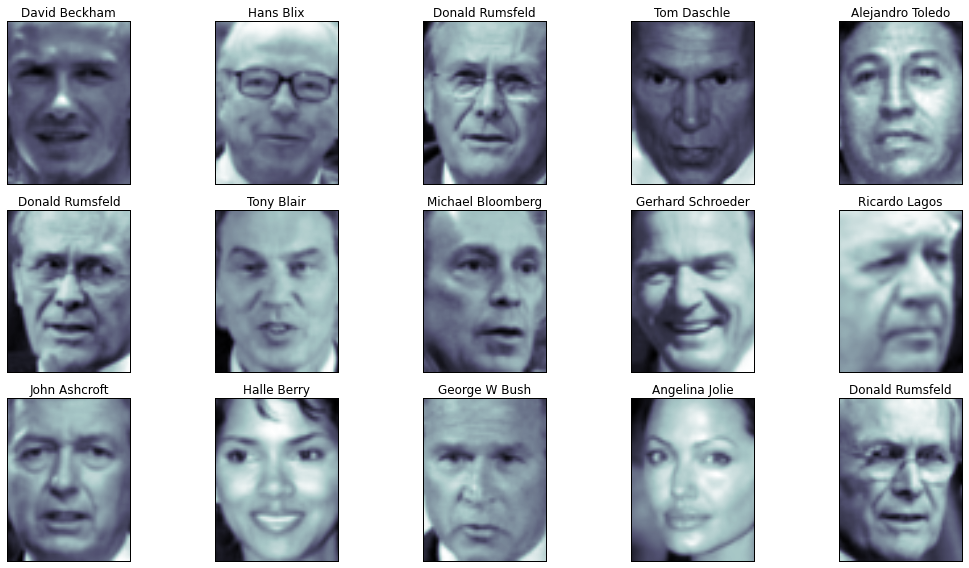

In [11]:
# plot some faces with their respective target name

fig, axes = plt.subplots(3, 5, figsize=(15,8), 
                         subplot_kw=dict([('xticks', ()), ('yticks', ())]))
for ax, image, name in zip(axes.ravel(), faces.images, faces.target):
    ax.imshow(image, cmap='bone')
    ax.set_title(faces.target_names[name], fontsize='large')
    
fig.tight_layout()

In [12]:
# check how many data points constitute some of the target names
counts = np.bincount(faces.target)

for i, (count, name) in enumerate(zip(counts[:40], faces.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 4 == 0:
        print('')

Abdullah Gul               19 Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Andy Roddick               15 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 Bill Gates                 17 
Bill Simon                 15 Carlos Menem               21 Carlos Moya                19 Colin Powell              236 
David Beckham              31 Dominique de Villepin      15 Donald Rumsfeld           121 Fidel Castro               18 
George Robertson           22 George W Bush             530 Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 
Gray Davis                 26 Guillermo Coria            30 Halle Berry                16 Hamid Karzai               22 
Hans Blix                  39 Hu Jintao                  15 Hugo Chavez                71 Igor Ivanov                20 
Jack Straw                 28 Ja

Based on the above table, we can see that there are some targets with disproportionately many instances. In order to prevent the likelihood of bias during training, only a specified threshold limit of instances per target name will be extracted.  

In [13]:
# use masking strategy to extract a certain number of instances per class
mask = np.zeros(faces.target.shape, dtype=np.bool)

# generate a Boolean mask with target instances not exceeding 70
for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:70]] = 1
    
X_faces = faces.data[mask]
y_faces = faces.target[mask]

# normalize the grayscale values for enhanced numerical stability
X_faces = X_faces / 255.0

In [14]:
# use kNN classifier to evaluate the dataset without reduced dimensions
from sklearn.neighbors import KNeighborsClassifier

# split the data into training and test sets; stratify dataset according to the proportions of the class labels
X_train, X_test, y_train, y_test = train_test_split(X_faces, y_faces, random_state=22, stratify=y_faces)

# train a kNN classifier with one neighbor on the unreduced training data for comparison 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('Test score: {:.2f}'.format(knn.score(X_test, y_test)))

Test score: 0.24


In [15]:
# instantiate PCA class with 100 components; whiten to rescale principal components
pca = PCA(n_components=100, whiten=True, random_state=2).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (2097, 100)


In [16]:
# train a kNN model with transformed dataset this time
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


As we can see, using a transformed representation of the training data led to better results on the test set.

In [17]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 2914)


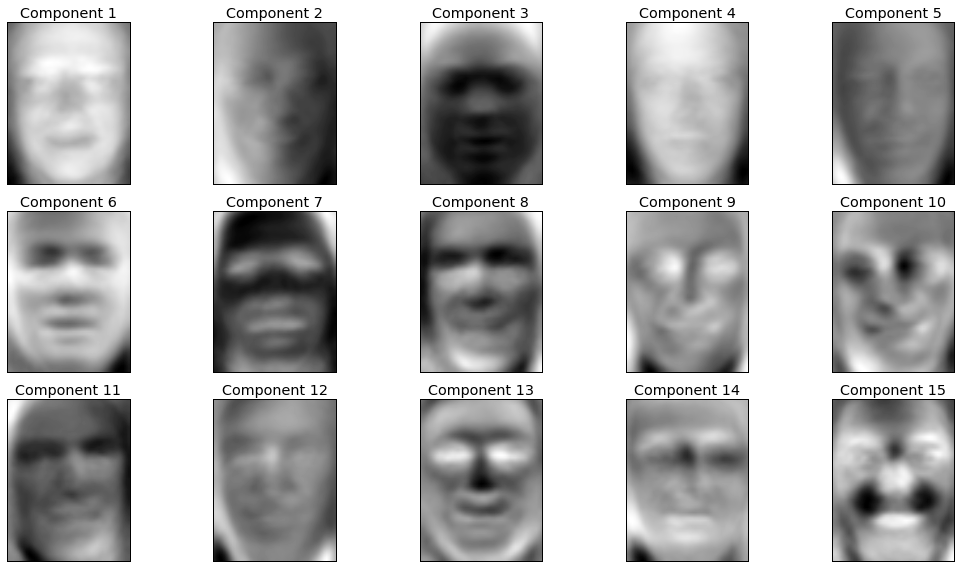

In [18]:
# plot the first 15 principal components

fig, axes = plt.subplots(3, 5, figsize=(15, 8),
    subplot_kw=dict([('xticks', ()), ('yticks', ())]))

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(faces_shape), cmap='binary')
    ax.set_title("Component {0}".format((i + 1)), fontsize='x-large')
    
fig.tight_layout()

Based on this figure, we can gain a high-level intuition as to what information is being captured within each principal component of the image data. For instance, it seems like the first component mostly encodes the contrast between a face and the background, and the second component encodes differences between the right and left half of a face. It is useful to imagine the reconstruction of the input image as the sum of the principal components across a pixel-based feature space.